# 2440016804 - Rio Pramana - LA01 - Final Exam - Nomor 2

#### Import libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Importing the dataset, downloaded file is in the same folder
csv_path = "DNA.csv"
dna_df = pd.read_csv(csv_path)

#### Run a quick check on the dataset

In [3]:
dna_df.shape

(14610, 2)

In [4]:
dna_df.head(5)

,num_of_atoms,num_of_heavy_atoms
0,14,6
1,11,5
2,15,6
3,21,7
4,20,7


In [5]:
dna_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14610 entries, 0 to 14609
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   num_of_atoms        14610 non-null  int64
 1   num_of_heavy_atoms  14610 non-null  int64
dtypes: int64(2)
memory usage: 228.4 KB


#### Check for missing data

In [6]:
dna_df.isnull().sum()

num_of_atoms          0
num_of_heavy_atoms    0
dtype: int64

There is no missing data

#### Check Data Summarization

In [7]:
dna_df.describe()

,num_of_atoms,num_of_heavy_atoms
count,14610.000000,14610.000000
mean,14.412594,5.903285
std,4.693705,1.113774
min,2.000000,2.000000
25%,11.000000,5.000000
50%,15.000000,6.000000
75%,18.000000,7.000000
max,33.000000,11.000000


#### Visualize data

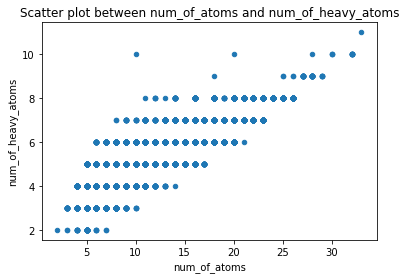

In [8]:
dna_df.plot.scatter(x='num_of_atoms', y='num_of_heavy_atoms', title= "Scatter plot between num_of_atoms and num_of_heavy_atoms");

plt.show(block=True);

## Algorithm

To implement this algorithm, I will use helper functions and main function. Main function will be the function which runs the algorithm while helper functions are used to help implement the algorithm

### Main Function

In [9]:
def main(data, k): #Receive data and k value
    #Data is an array containing points in the dataset
    
    #Select random centroids first
    centroids = init_centroids(data, k)
    #Display the randomized centroids
    print("Random centroids:")
    print(centroids)
    
    #Repeat the Expectation and Maximization mentioned in the algorithm
    while True:
        old_centroids = centroids
        labels = get_labels(data, centroids) #Get label for each point in the data
        centroids = update_centroids(data, labels, k) #Update the centroids using labels retrieved earlier
        #Display the centroids each time it is updated
        print("\nUpdated centroids:")
        print(centroids)
        #Logic for stopping the algorithm (When centroid movement is equal or almost equal to 0)
        if should_stop(old_centroids, centroids):
            break
            
    #Return the centroids
    return centroids

### Helper Functions

#### Initializing centroids (randomizing centroids)

In [10]:
def random_sample(low, high):
    #Randomly sampling a member of uniformly distributed number between 0 and 1
    return low + (high - low) * np.random.random_sample()

def init_centroids(data, k):
    #Randomizing centroids within the region of data points
    x_min = y_min = float('inf') #Set minimum to infinity
    x_max = y_max = float('-inf') #Set maximum to -infinity
    #Set min and max
    for point in data:
        x_min = min(point[0], x_min)
        x_max = max(point[0], x_max)
        y_min = min(point[1], y_min)
        y_max = max(point[1], y_max)
    
    #Creating a list of k-centroids by randomly sampling x and y coordinates within given region of data points
    centroids = []
    for i in range(k):
        centroids.append([random_sample(x_min, x_max), random_sample(y_min, y_max)])
    return centroids

#### Get labels for every data point

In [11]:
def get_distance(x1, x2):
    #Calculating euclidean distance
    return ((x1[0] - x2[0]) ** 2 + (x1[1] - x2[1]) ** 2) ** 0.5
    
def get_labels(data, centroids):
    labels = []
    #Compute/calculate the distance of each point to every centroid
    for point in data:
        min_dist = float('inf')
        label = None
        for i, centroid in enumerate(centroids):
            new_dist = get_distance(point, centroid)
            #Selecting centroid with the shortest distance
            if min_dist > new_dist:
                min_dist = new_dist
                label = i #Assign new label if shorter centroid is found
        labels.append(label)
    return labels

#### Update Centroids

In [12]:
#Updating centroids using mean of points retrieved from previous step
def update_centroids(points, labels, k):
    new_centroids = [[0,0] for i in range(k)] #Initialize new centroids
    counts = [0] * k #Count of data points belonging to each cluster
    
    #Get the numerator and denominator to calculate mean
    for point, label in zip(points, labels):
        new_centroids[label][0] += point[0]
        new_centroids[label][1] += point[1]
        counts[label] += 1
    
    #Compute/calculate the mean of points
    for i, (x,y) in enumerate(new_centroids):
        new_centroids[i] = (x / counts[i], y / counts[i]) #Divide sum by count
    return new_centroids

#### Stop Algorithm

In [13]:
#Stop algorithm if movement is less than the threshold
#In this case, the threshold (0.00001) is considered close enough to 0
def should_stop(old_centroids, new_centroids, threshold = 1e-5):
    total_movement = 0
    #Get the movement
    for old_point, new_point in zip(old_centroids, new_centroids):
        total_movement += get_distance(old_point, new_point)
    #Display the movement
    print("Movement:")
    print(total_movement)
    
    return total_movement < threshold

## Run the algorithm

In [14]:
centroids = main(np.asarray(dna_df), 2)
print("\nFinal centroids:")
print(centroids)

Random centroids:
[[11.162275258053333, 6.28348631544167], [27.66689454486305, 8.651466617670664]]

Updated centroids:
[(13.200271717413889, 5.660033565092304), (21.646638054363375, 7.354792560801145)]
Movement:
8.289541344579794

Updated centroids:
[(12.30277205469189, 5.487638134482113), (20.142166836215665, 7.032044760935911)]
Movement:
2.4526075858704433

Updated centroids:
[(11.708993033565548, 5.374181971712054), (19.39972741433022, 6.879283489096573)]
Movement:
1.3625134381339146

Updated centroids:
[(11.114409325802187, 5.26499218843889), (18.77643504531722, 6.7478136428685005)]
Movement:
1.2415332485868578

Updated centroids:
[(10.570958904109588, 5.142328767123288), (18.248974008207934, 6.663201094391245)]
Movement:
1.091326260630931

Updated centroids:
[(10.50326979268123, 5.138722693752609), (18.197628990974, 6.6435403475683685)]
Movement:
0.12276560190139793

Updated centroids:
[(10.50326979268123, 5.138722693752609), (18.197628990974, 6.6435403475683685)]
Movement:
0.0

F